In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
le = pd.read_csv('DataSet.csv', sep=',')
le.dataframeName = 'DataSet.csv'
le.head()

,Variable,row,age,sex,b1,b2,b3,b4,b5,b6,...,rezayat,manaviat,shadi,behzisti,maharat ej,raftar,parkhash,bartari,rabete hamsal,maharat
0,Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,42.0,22.0,48.0,170.0,89.0,20.0,17.0,17.0,25.0,168.0
2,NaN,2.0,NaN,1.0,3.0,1.0,2.0,1.0,2.0,1.0,...,43.0,21.0,47.0,171.0,80.0,19.0,26.0,17.0,28.0,170.0
3,NaN,3.0,NaN,1.0,3.0,4.0,4.0,1.0,1.0,1.0,...,34.0,27.0,42.0,171.0,81.0,14.0,17.0,9.0,14.0,135.0
4,NaN,4.0,NaN,1.0,2.0,5.0,2.0,2.0,2.0,2.0,...,45.0,25.0,53.0,193.0,84.0,14.0,20.0,18.0,19.0,155.0


## DATA PREPROCESSING
### -Data Cleaning:


In [26]:
# Modify the original names of the features using a standard format for all the features.
orig_cols = list(le.columns) 
new_cols = [] 
for col in orig_cols:     
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower()) 
    

le.columns = new_cols
# Compute a summary of statistics only for the numerical features.
le.describe()

,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat_ej
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,20.218750,27.412500,18.550000,43.856250,26.400000,48.443750,186.037500,72.675000
std,3.834094,4.331234,4.938362,9.710169,5.695855,7.819301,29.319512,8.966429
min,8.000000,15.000000,8.000000,22.000000,12.000000,25.000000,103.000000,52.000000
25%,18.000000,25.000000,15.000000,38.000000,22.000000,43.000000,168.750000,67.000000
50%,20.000000,28.000000,18.000000,43.000000,26.000000,48.500000,187.000000,74.000000
75%,23.000000,30.000000,21.000000,50.000000,31.000000,54.000000,206.000000,80.000000
max,29.000000,37.000000,34.000000,80.000000,40.000000,71.000000,272.000000,89.000000


In [24]:
# Discard the metadata (age and variable and row).
le = le.drop(['age', 'variable', 'row'], axis=1)

KeyError: "['age' 'variable' 'row'] not found in axis"

In [25]:
le.head()

,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat_ej
1,15.0,28.0,16.0,42.0,22.0,48.0,170.0,89.0
2,18.0,26.0,17.0,43.0,21.0,47.0,171.0,80.0
3,15.0,31.0,18.0,34.0,27.0,42.0,171.0,81.0
4,24.0,29.0,20.0,45.0,25.0,53.0,193.0,84.0
5,24.0,25.0,12.0,40.0,22.0,38.0,159.0,74.0


In [6]:
# For each feature count all rows with NULL values.
le.isnull().sum()

sex              21
b1               21
b2               21
b3               21
b4               21
                 ..
raftar           21
parkhash         21
bartari          21
rabete_hamsal    21
maharat          21
Length: 147, dtype: int64

In [7]:
# For each feature delete all rows with NULL values.
le.dropna(inplace=True)
le.isnull().sum()

sex              0
b1               0
b2               0
b3               0
b4               0
                ..
raftar           0
parkhash         0
bartari          0
rabete_hamsal    0
maharat          0
Length: 147, dtype: int64

In [8]:
#Change column order to better perform splits
new_order = [134,135,136,137,138,139,140,141]
le = le[le.columns[new_order]]
le.head()

,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat_ej
1,15.0,28.0,16.0,42.0,22.0,48.0,170.0,89.0
2,18.0,26.0,17.0,43.0,21.0,47.0,171.0,80.0
3,15.0,31.0,18.0,34.0,27.0,42.0,171.0,81.0
4,24.0,29.0,20.0,45.0,25.0,53.0,193.0,84.0
5,24.0,25.0,12.0,40.0,22.0,38.0,159.0,74.0


## - Data Exploration

In [9]:
# Get a concise summary of the dataset.
le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 160
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   roshd        160 non-null    float64
 1   khodpeiravi  160 non-null    float64
 2   ertebatm     160 non-null    float64
 3   rezayat      160 non-null    float64
 4   manaviat     160 non-null    float64
 5   shadi        160 non-null    float64
 6   behzisti     160 non-null    float64
 7   maharat_ej   160 non-null    float64
dtypes: float64(8)
memory usage: 11.2 KB


#### Box Plots

KeyError: 'maharat'

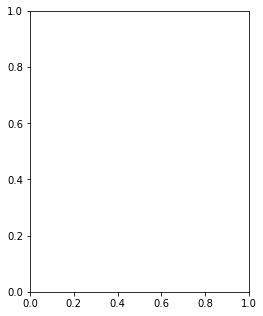

In [10]:
# Create a dictionary of columns representing the features of the dataset.
col_dict = {'maharat':1,'roshd':2,'khodpeiravi':3,'ertebatm':4,'rezayat':5,'manaviat':6,'shadi':7,'behzisti':8}

# Visualize the data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()
le.shape

In [ ]:
# Remove the outliers using the interquartile range (IQR).
Q1 = le.quantile(0.25)
Q3 = le.quantile(0.75)
IQR = Q3 - Q1

le = le[~((le < (Q1 - 1.5 * IQR)) |(le > (Q3 + 1.5 * IQR))).any(axis=1)]


# Print the dimensions of the cleaned dataset.
le.shape

In [ ]:
# Visualize the cleaned data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)
plt.show()

In [ ]:
# Plot heatmap to visualize the correlations.
plt.figure(figsize = (14, 12))
sns.heatmap(le.corr(), annot = True)
plt.title('Correlation between different features');

### Scatter Plots

In [ ]:
# # Create a vector containing all the features of the dataset.
# all_col = ['adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitis_b','measles','bmi',
#          'under-five_deaths','polio','total_expenditure','diphtheria','hiv/aids','gdp','population','thinness_1-19_years',
#          'thinness_5-9_years','income_composition_of_resources','schooling']

# plt.figure(figsize=(15,30))

# # Plot each feature in function of the target variable (life_expectancy) using scatter plots.
# for i in range(len(all_col)):
#     plt.subplot(7,3,i+1)
#     plt.scatter(le[all_col[i]], le['life_expectancy'])
#     plt.xlabel(all_col[i])
#     plt.ylabel('Life Expectancy')

# plt.show()

## - Features Extraction

## PCA

In [ ]:
# inja ham hamona ro mizarim...